In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

# Probability Theory for Thermal Physics - Lecture 3

```{admonition} Learning outcomes:
:class: outcomes
- Identify and use the **normal (Gaussian) distribution** as an approximation to many natural phenomena.
- Understand the Central Limit Theorem and its relevance to Thermodynamics.
- Describe the **Poisson distribution** and its relevance to counting statistics and random thermal events.

## Key Distributions - Gaussian, Poisson, Maxwell-Boltzmann

In thermal physics, we often study systems comprised of an enormous number of particles. Instead of tracking the exact trajectories of each particle exhaustively, we rely on probability distributions which describe the typical behaviour of the system as a whole. The Gaussian, Poisson, and Maxwell-Boltzmann distributions are especially important because they each capture a common pattern observed in physical processes present in thermodynamics. Understanding these distributions helps in explaining how microscopic randomness produces the macroscopic behaviour we observe. Consider this an introduction to these key distributions, as we will go through them in more detail within Chapter 6.

### Gaussian (Normal) Distribution

A continuous, bell-shaped probability density function:

$$
f(x; \mu, \sigma)=\frac{1}{\sqrt{2\pi}\, \sigma}\exp\! \left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\tag{2.24}
$$

The mean and variance are $\langle x\rangle=\mu$ and $\sigma^2$.
By the Central Limit Theorem, the sum or average of many independent random variables tends toward a Gaussian distribution, regardless of the original shape.

The Gaussian distribution is relevant because many physical quantities arise from the combined effect of many small, often random contributions. When these contributions add together, their overall behaviour tends to form a Gaussian distribution with its characteristic bell-shaped curve. This is why energy fluctuations, measurement noise, and small variations in macroscopic observables often follow a normal distribution. In practice, the Gaussian serves as a “default” model for fluctuations in thermal systems, reflecting how microscopic randomness smooths out into predictable macroscopic behaviour. An extremely common type of Gaussian distribution is the *standard normal distribution*, which is when $\mu = 0$ and $\sigma = 1$.

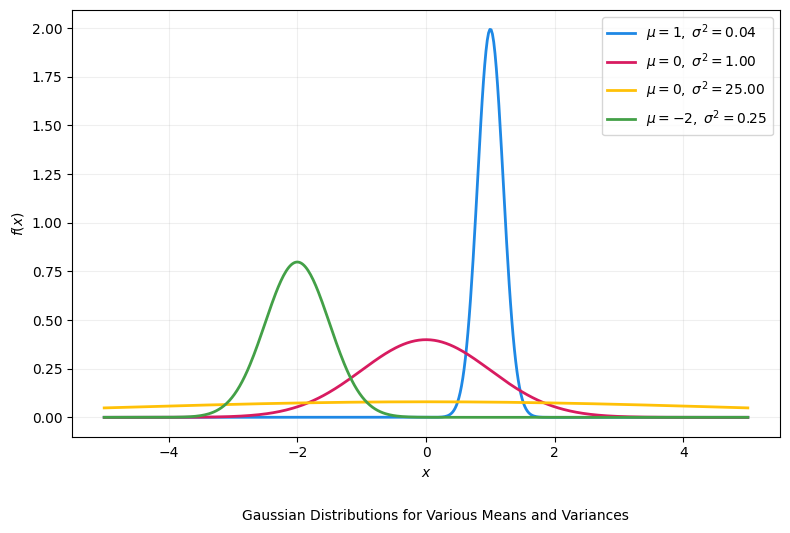

In [3]:
CUD_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]

def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2*np.pi)*sigma) * np.exp(-(x - mu)**2 / (2*sigma**2))

x = np.linspace(-5, 5, 500)

params = [
    (1, 0.2),
    (0, 1.0),
    (0, 5.0),
    (-2, 0.5)
]

plt.figure(figsize=(8, 5))

# Cycle through colours
for (mu, sigma), col in zip(params, CUD_COLORS):
    y = gaussian(x, mu, sigma)
    plt.plot(
        x, y,
        color=col,
        linewidth=2,
        label=f"$\\mu={mu},\\;\\sigma^2={sigma**2:.2f}$"
    )

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(
    x=0.55, y=-0.05,
    s="Gaussian Distributions for Various Means and Variances",
    ha='center'
)

plt.show()

The Gaussian distribution appears constantly in thermal physics because macroscopic quantities are the sum of many small, independent fluctuations. By the Central Limit Theorem, the distribution of these sums tends to a normal distribution regardless of the microscopic details. As a result, Gaussian noise underlies phenomena such as measurement uncertainty, Brownian motion, and thermal fluctuations in equilibrium systems.

In thermodynamics, the variance of a Gaussian-distributed observable measures the strength of its fluctuations around equilibrium. These fluctuations are typically extremely small for macroscopic systems because the variance of the mean scales as $\sigma^2 / N$, with $N$ on the order of Avogadro’s number. This is why quantities like pressure or temperature appear ‘stable’ in spite of the chaotic molecular motion responsible for it.

## The Central Limit Theorem

The *Central Limit Theorem* is one of the most important ideas within probability and statistics. It explains why the Guassian distribution is ubiquitous in nature, even when the system underlying the data is non-Gaussian. The theorem states that *"if you take the mean of many independent samples drawn from any distribution with finite mean and variance, then the distribution of those sample means tends towards a normal distribution as the sample size increases".

This new distribution is referred to as the **sampling distribution of the sample mean**. Symbollically, if we have the following:

- Original variable $X$,
- True mean $\mu = \langle X \rangle$,
- True standard deviation $\sigma = \sqrt{Var(X)}$,

then if we let $\bar{X}_n$ be the mean of $n \in \mathbb{N}$ independent samples of $X$, the distribution of $\bar{X}_n$ approaches a normal distribution as $n$ increases:

$$
\bar{X}_n \sim \mathcal{N}(\mu,  \frac{\sigma^2}{n}).
$$

To see this concept in action, let us look at a variable $x$ which is sampled from an arbitrary discrete distribution, which we define as hosting four values {1, 3, 4, 6} with corresponding weights {0.45, 0.15, 0.10, 0.30}. Any draw from this distribution is independent of previous or subsequent draws.

As it will be useful for illustrating the reality of the central limit theorem, let us first compute the mean and standard deviation of this distribution:

$$\langle x \rangle = \sum_i x_i \ p_i(x) = 0.45\cdot1 + 0.15\cdot3 + 0.10\cdot4 + 0.30\cdot6 = 3.1 \to \langle x \rangle^2 = 9.61$$

$$\langle x^2 \rangle = \sum_i x_i^2 \ p_i(x) = 0.45\cdot1^2 + 0.15\cdot3^2 + 0.10\cdot4^2 + 0.30\cdot6^2 = 14.20$$

$$\sigma = \sqrt{Var(x)} = \sqrt{\langle x^2 \rangle - \langle x \rangle^2} = \sqrt{14.20 - 9.61} = \sqrt{4.59} \approx 2.14$$

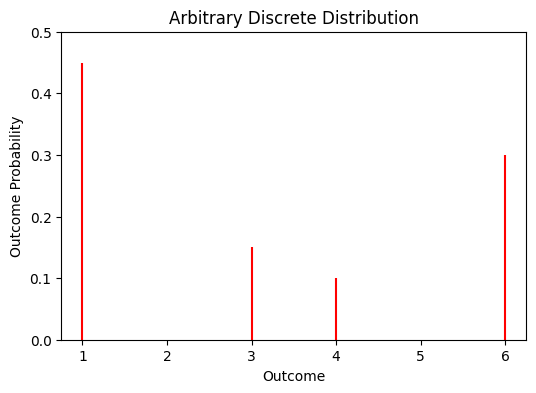

In [20]:
values = np.array([1, 3, 4, 6])
probs  = np.array([0.45, 0.15, 0.10, 0.30])

fig, ax = plt.subplots(figsize=(6,4))

# Note: markerfmt=" " removes the circle cleanly
markerline, stemlines, baseline = ax.stem(
    values, probs,
    linefmt="red",
    markerfmt=" ",        # <--- THIS REMOVES THE MARKERS
    basefmt=" "
)

ax.set_xlabel("Outcome")
ax.set_ylabel("Outcome Probability")
ax.set_title("Arbitrary Discrete Distribution")
ax.set_ylim(0, 0.5)

plt.show()

Evidently, this distribution does not reflect a normal distribution at all. But observe what happens as we begin to acquire sets consisting of $n$ samples from this distribution...

- $x_{(n=4, \  i=1)} = \{1, 1, 3, 6\} \to \bar{x}_{(n=4, \  i=1)} = 2.75$;
- $x_{(n=4, \  i=2)} = \{1, 3, 3, 6\} \to \bar{x}_{(n=4, \  i=2)} = 3.25$;
- $x_{(n=4, \  i=3)} = \{3, 6, 3, 3\} \to \bar{x}_{(n=4, \  i=3)} = 3.75$;
- $x_{(n=4, \  i=3)} = \{1, 1, 1, 4\} \to \bar{x}_{(n=4, \  i=4)} = 1.75$;

etcetera. Were we to draw 4 samles twenty thousand times, calculate the mean of each sample and place them on a histogram, we obtain the distribution on the left below. It still resembles the original distribution, in that there are still gaps in the available outcomes; but by increasing the size of the sample set the distribution we realise begins to more closely resemble a normal distribution. In the plot below, we see that the distribution of the sample means begins to greater represent a normal distribution as we increase the sample size per draw.

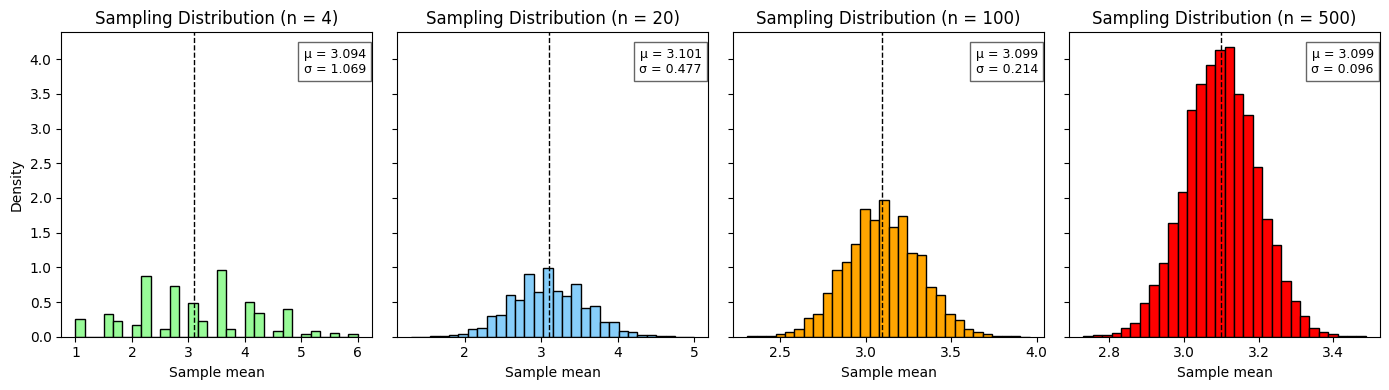

In [39]:
def sample_means(n, draws=20000):
    return np.mean(np.random.choice(values, size=(draws, n), p=probs), axis=1)

means_4   = sample_means(4)
means_20  = sample_means(20)
means_100 = sample_means(100)
means_500 = sample_means(500)

datasets = [
    (means_4,   4,   'palegreen'),
    (means_20,  20,  'lightskyblue'),
    (means_100, 100, 'orange'),
    (means_500, 500, 'red'),
]

fig, axes = plt.subplots(1, 4, figsize=(14,4), sharey=True)
numbins = 30

for ax, (data, n, colour) in zip(axes, datasets):

    # histogram
    ax.hist(data, bins=numbins, density=True, color=colour, edgecolor='black')

    # compute stats
    mu = np.mean(data)
    sigma = np.std(data)

    # black vertical line at mean
    ax.axvline(mu, color='black', linestyle='--', linewidth=1)

    # annotation box (top-right)
    ax.text(
        0.98, 0.95,
        f"μ = {mu:.3f}\nσ = {sigma:.3f}",
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='black')
    )

    # labels and title
    ax.set_title(f"Sampling Distribution (n = {n})")
    ax.set_xlabel("Sample mean")

axes[0].set_ylabel("Density")

plt.tight_layout()
plt.show()

We can see an increasingly peaked Gaussian form as the sample size per draw increases, in line with our expectations. For a small sample size, the distribution closely resembles the initial discrete one, and in fact if we were drawing sample sizes of one it would exactly resemble the original. However, as the draw size increases we begin to observe the classic bell-shaped curve customary of a Gaussian. You'll note that the mean of these distributions is very close to the original distribution's mean all along, but the standard deviation increases, making the distribution narrower as the draw size goes up.

This too is expected, as we noted that the Guassian that emerges from this sampling procedure has a standard deviation $\sigma_n = \sigma / \sqrt{n}$. Let us check how well these standard deviations aligned with our expectations...

Recalling that $\sigma \approx 2.14$, we denote the standard deviation we expect to obtain as $\sigma_{n}$, and the standard deviation we actually obtain through sampling as $\hat{\sigma}_n$. Finally, we define the discrepancy between the two via:

$$
\Delta\sigma_n = \mid \sigma_{n} - \hat{\sigma}_n \mid
$$

Then with these tools at our disposal:

$$\sigma_{n=4} = \frac{2.14}{\sqrt{4}} = 1.07 \to \Delta \sigma_{n=4} = \mid 1.07 - 1.069 \mid = 0.001$$

$$\sigma_{n=20} = \frac{2.14}{\sqrt{20}} = 0.479 \to \Delta \sigma_{n=20} = \mid 0.479 - 0.477 \mid = 0.002$$

$$\sigma_{n=100} = \frac{2.14}{\sqrt{100}} = 0.214 \to \Delta \sigma_{n=100} = \mid 0.214 - 0.214 \mid = 0$$

$$\sigma_{n=500} = \frac{2.14}{\sqrt{500}} = 0.096 \to \Delta \sigma_{n=500} = \mid 0.96 - 0.96 \mid = 0$$

So as you can see, our newly-generated distributions display near-perfect alignment with the parameter values proposed by the Central Limit Theorem. It is also clear how the standard deviation in these distributions gradually reduces with the increase in draw size, meanining that if we were estimating our uncertainity in the population mean, then taking larger sample sizes from the population would reduce our uncertainity.

#### How much water should you bring on a trip for a group

For a more practical example of how the central limit theorem is useful, picture a scenario where you are scheduling a hiking trip for fifty people, and you're aware that the average person drinks 2.0 $\pm$ 0.7 L of water on hikes such as these. Your intention is to bring 110 L of water with you, so what is the probability that you exhaust your supply?

If the 110 L of water is evenly distributed amongst the participants, then their individual allotment is 2.2 L, and we need the average water consumption of the group to be no higher than this. The probability distribution for an individual's water consumption on a given walk could resemble any shape, but because we know the average consumption, the standard deviation and the sample size already, we can use the Central Limit Theorem to make quick conclusions about the water consumption of a groupL

$$\langle \text{water consumption} \rangle_{50} \sim  \mathcal{N}(\mu,  \frac{\sigma^2}{50}) = \mathcal{N}(2.0,  \frac{0.7^2}{50})$$

We can quickly compute that the standard deviation in the group's water consumption should be $0.7^2 /\sqrt{50} \approx 0.01 \ L$. Using the graph below, we can see the threshold that we are attempting to compute the probability of surpassing:

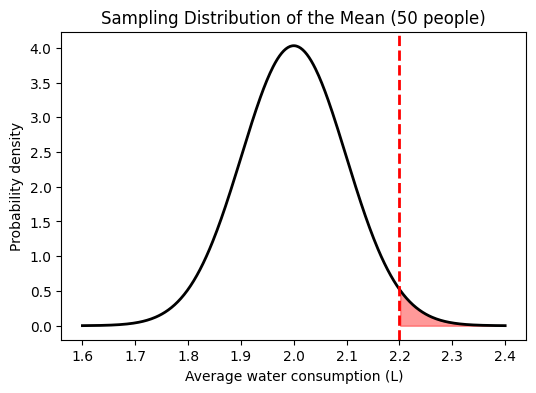

In [41]:
mu = 2.0
sigma = 0.7
n = 50

sigma_bar = sigma / np.sqrt(n)

x = np.linspace(1.6, 2.4, 400)
pdf = norm.pdf(x, mu, sigma_bar)

threshold = 2.2

plt.figure(figsize=(6,4))
plt.plot(x, pdf, color='black', lw=2)

# Shade the tail where we run out of water
mask = x >= threshold
plt.fill_between(x[mask], pdf[mask], color='red', alpha=0.4)

plt.axvline(threshold, color='red', linestyle='--', lw=2)
plt.xlabel("Average water consumption (L)")
plt.ylabel("Probability Density")
plt.title("Sampling Distribution of the Mean (50 people)")

plt.show()

What is the probability that we lie in the red region? We could compute this by integrating over the Gaussian distribution up to the threshold of 2.2 L, but more simply we can take advantage of the definition of standard deviations. First, how many standard deviations away from the mean is 2.2 L ?

$$\frac{2.2 - 2.0}{0.1} = \frac{0.2}{0.1} = 2 \ \text{standard deviations}$$.

We can now make use of the **empirical rule** which denotes:

$$P(\mu - 1\sigma \leq X \leq \mu + 1\sigma) \approx 68.27\%$$,

$$P(\mu - 2\sigma \leq X \leq \mu + 2\sigma) \approx 95.45\%$$,

$$P(\mu - 3\sigma \leq X \leq \mu + 3\sigma) \approx 99.73\%$$.

So, values beyond two standard deviations from the mean have a $100\% - 95.45\% = 4.55\%$ chance in occurring, but since we are only considering the upper bound, we can half this value to 2.275%. Therefore, there is a 2.275% chance that you run out of water on the trip.

The Central Limit Theorem is vital to thermodynamics because it explains why macroscopic measurements are stable and predictable despite enormous microscopic randomness. Quantities such as internal energy, pressure on a container wall, heat capacity, or the number of particles in a sub-volume are all sums of contributions from an unfathomably large number of molecules. Although each molecule’s velocity, collision time, or position fluctuates chaotically, these fluctuations are approximately independent. When millions or billions of such contributions are averaged, the Central Limit Theorem guarantees that the resulting distribution of the observable becomes Gaussian with extremely small relative variance. As a result, thermodynamic quantities do not wildly fluctuate, instead they obey smooth laws like the ideal gas law or the Maxwell–Boltzmann distribution. The Central Limit theorem is therefore one of the key bridges between statistical mechanics and classical thermodynamics, and it explains why macroscopic behaviour emerges from microscopic chaos.

## Poisson Distribution

The Poisson distribution describes the probability of observing $k$ occurrences of a rare event in a fixed interval of time, space, or volume, when:

1. Events occur independently of one another. E.g. if a detector picks up on a photon, it does not increase the chance of another arriving later.

2. The average rate of event occurance is constant.

3. Events do not occur simultaneously. I.e. the probabiity of two or more events occuring in an infinitesmally small interval is negligible.

This distribution is defined by a single parameter, $\lambda$, which defines the rate of event occurance:

$$
P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
\tag{2.25}
$$

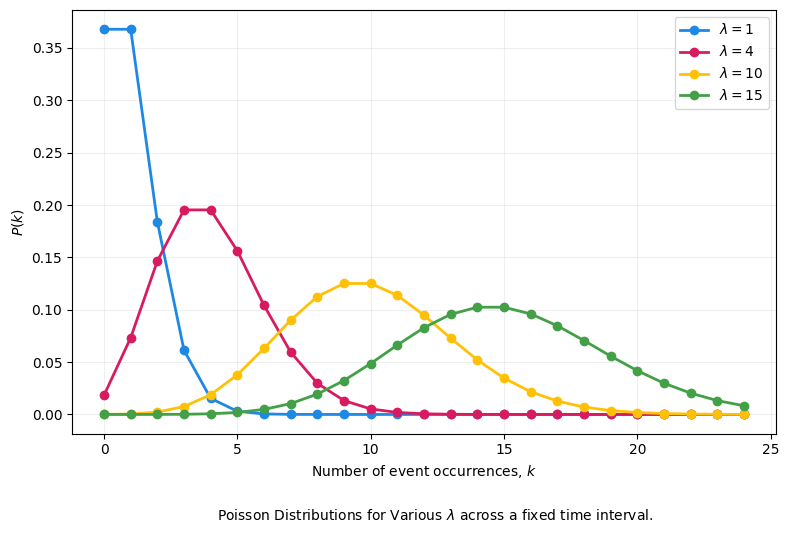

In [42]:
# Material Design palette
MATERIAL_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]

ks = np.arange(0, 25)
lambdas = [1, 4, 10, 15]

plt.figure(figsize=(8, 5))

for lam, col in zip(lambdas, MATERIAL_COLORS):
    y = poisson.pmf(ks, lam)
    plt.plot(
        ks, y,
        marker='o',
        color=col,
        linewidth=2,
        label=f"$\\lambda={lam}$"
    )

plt.xlabel("Number of event occurrences, $k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(x=0.55, y=-0.05, s="Poisson Distributions for Various $\\lambda$ across a fixed time interval.",
            ha='center')

plt.show()


#### Why it appears in physics:

Many physical processes involve independent, randomly spaced events such as:
- radioactive decay (each nucleus decays roughly independently, save for more intense environments like a nuclear reactor),
- photon arrivals in a photodetector,
- particle collisions in a dilute gas,
- cosmic ray counts in stellar observation.

Whenever events occur at steady rate, and exhibit no interdependence, the Poisson model is a natural choice for interpreting the underlying system behaviour.


#### Mean and Variance:

A distinctive property of the Poisson distribution is that its mean and variance are equal:

$$
\langle k \rangle = \lambda,
\qquad
\mathrm{Var}(k) = \lambda.
$$

The standard deviation therefore scales as:

$$
\sigma_k = \sqrt{\lambda}.
$$

This relationship has important consequences for measurements based on event counting.

#### Poissonian (Shot) Noise:

In any experiment where you physically count discrete events, e.g. photons hitting a detector, radioactive decays recorded by a Geiger tube, electrons arriving at an amplifier; the number of events detected in a fixed interval fluctuates randomly. Even if the underlying system behaves perfectly, these fluctuations cannot be eliminated: they arise from the fundamental randomness of the arrival process itself.

For a Poisson process with mean count $\langle k \rangle = \lambda = N$, the fluctuations are

$$
\sigma = \sqrt{N},
$$

so the *absolute* size of the noise (the size of the fluctuations themselves) increases as you detect more events. However, the *relative* noise (the size of the fluctuations relative to the signal itself) decreases:

$$
\frac{\sigma}{N} = \frac{\sqrt{N}}{N} = \frac{1}{\sqrt{N}}.
$$

This means that doubling the number of detected events does not halve the noise; instead the improvement in precision follows a square–root law. Collecting more counts therefore increases the signal-to-noise ratio, but with diminishing returns.

These fluctuations are known as *shot noise*. They represent a hard statistical limit on the precision of any measurement based on discrete event counting. No amount of engineering or detector refinement can remove shot noise entirely - it originates from the Poisson statistics of the underlying process, not from imperfections in the apparatus. We can visualise how the absolute and relative noise changes with $N$ in the figures below:



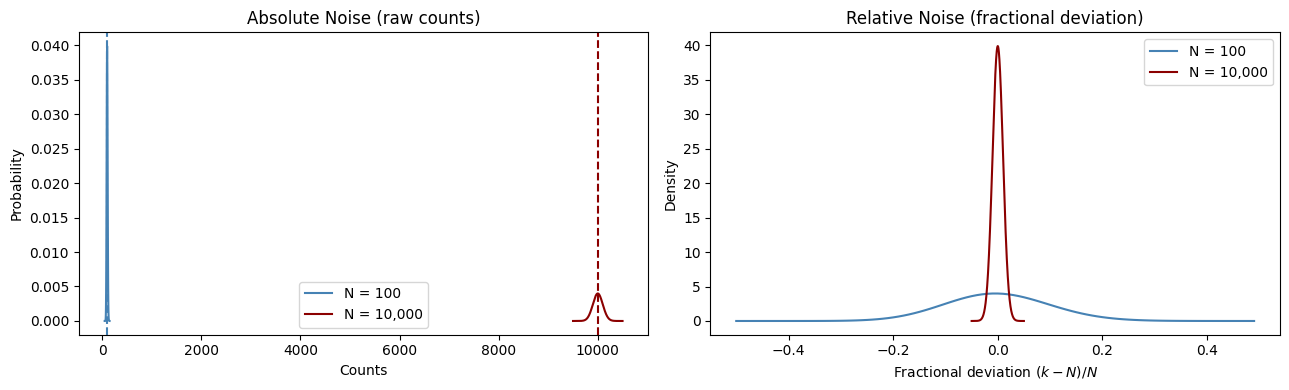

In [44]:
# Two example mean counts
N_small = 100
N_large = 10000

sigma_small = np.sqrt(N_small)
sigma_large = np.sqrt(N_large)

# --- Plot settings ---
fig, axes = plt.subplots(1, 2, figsize=(13,4))

# -------------------------------------------------------------
# LEFT PANEL: Absolute Noise (raw count scale)
# -------------------------------------------------------------
x1 = np.arange(N_small - 5*sigma_small, N_small + 5*sigma_small)
x2 = np.arange(N_large - 5*sigma_large, N_large + 5*sigma_large)

axes[0].plot(x1, poisson.pmf(x1, N_small), label="N = 100", color='steelblue')
axes[0].plot(x2, poisson.pmf(x2, N_large), label="N = 10,000", color='darkred')

axes[0].axvline(N_small, color='steelblue', linestyle='--')
axes[0].axvline(N_large, color='darkred', linestyle='--')

axes[0].set_title("Absolute Noise (raw counts)")
axes[0].set_xlabel("Counts")
axes[0].set_ylabel("Probability")
axes[0].legend()

# -------------------------------------------------------------
# RIGHT PANEL: Relative Noise (normalised by mean)
# -------------------------------------------------------------
xs = (x1 - N_small)/N_small   # fractional deviation from mean
xl = (x2 - N_large)/N_large


pmf_small_scaled = poisson.pmf(x1, N_small) * N_small
pmf_large_scaled = poisson.pmf(x2, N_large) * N_large

axes[1].plot(xs, pmf_small_scaled, label="N = 100", color='steelblue')
axes[1].plot(xl, pmf_large_scaled, label="N = 10,000", color='darkred')

axes[1].set_title("Relative Noise (fractional deviation)")
axes[1].set_xlabel("Fractional deviation $(k-N)/N$")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()


The two plots above illustrate the difference between *absolute* and *relative* noise
in a Poisson process.

When the mean count is small (left), the fluctuations are about ±10 counts.
When the mean count is large (right), the fluctuations are about ±100 counts.
This is the *absolute* noise, which scales as √N.

However, compare these fluctuations to the mean:
- 10 is 10% of 100,
- 100 is only 1% of 10,000.

This fractional uncertainty is the *relative* noise, scaling as $1/\sqrt{N}$.
The absolute noise grows, but the relative noise shrinks.

#### Connection to the Binomial Distribution:

The Poisson distribution arises as a limiting case of the binomial distribution. If an event has a very small probability $p$ of occurring in each of $n$ independent trials, with $np = \lambda$ held constant as $n \rightarrow \infty$, then

$$
\mathrm{Binomial}(n,p)
\;\longrightarrow\;
\mathrm{Poisson}(\lambda).
$$

This explains why the Poisson model is appropriate for rare events occurring in large populations or high-frequency processes: each individual trial is extremely unlikely to produce an event, but the sheer number of trials leads to a steady average rate.

#### Example: Radioactive Decay

If a radioactive sample emits on average $\lambda = 12$ decays per minute, then the probability of detecting exactly $k = 15$ decays in a given minute is

$$
P(k=15;\lambda=12)
=
\frac{12^{15} e^{-12}}{15!}
\approx 0.072.
$$

Such fluctuations of order $\sqrt{\lambda} \approx 3.46$ are typical and must be accounted for when interpreting counting experiments in nuclear physics, optics, and particle detection.




## Maxwell–Boltzmann Speed Distribution (3D Ideal Gas)

The Maxwell-Boltzmann distribution is a particular probability distribution named after James Clerk Maxwell and Ludwig Boltzmann, and was first defined for describing particle speeds in idealized gases.

$$
f(v; T, m)=4\pi\! \left(\frac{m}{2\pi k_B T}\right)^{3/2} v^2 \exp\! \left(-\frac{m v^2}{2k_B T}\right), \qquad v\ge 0
\tag{2.26}
$$

The Maxwell–Boltzmann distribution plays a central role in kinetic theory because it describes the spread of particle speeds in a classical ideal gas. It shows that, at a given temperature, some particles move slowly while others move very fast, and it gives precise predictions for the most probable speed, the average speed, and the rms speed. These predictions feed directly into calculations of pressure, diffusion, heat transfer, and collision rates. In essence, this distribution connects random molecular motion to the observable properties of gases.

Key quantities:

- Most probable speed: $v_p=\sqrt{\frac{2k_B T}{m}}$
- Mean speed: $\langle v\rangle=\sqrt{\frac{8k_B T}{\pi m}}$
- RMS speed: $v_{\mathrm{rms}}=\sqrt{\frac{3k_B T}{m}}$

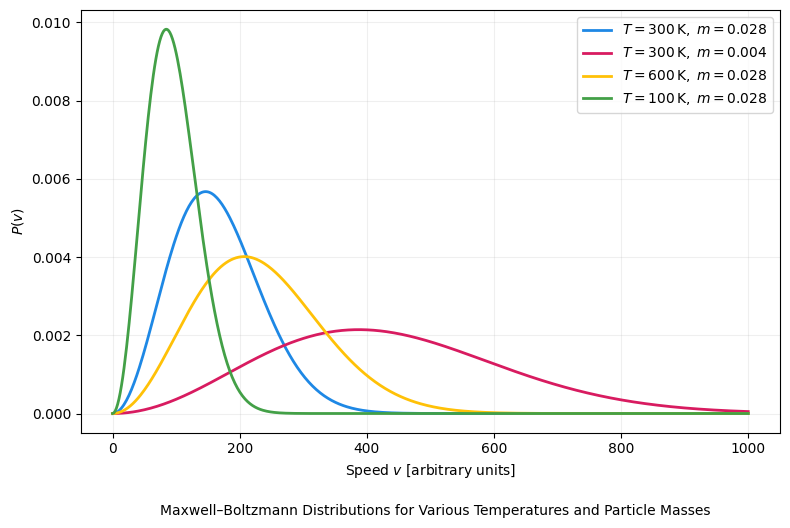

In [7]:
# Material Design palette
MATERIAL_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]


def maxwell_boltzmann(v, T, m, kB=1):
    return 4 * np.pi * (m / (2 * np.pi * kB * T)) ** 1.5 * v ** 2 * np.exp(-m * v ** 2 / (2 * kB * T))


v = np.linspace(0, 1000, 500)

params = [
    (300, 0.028),  # Room temp, nitrogen-like
    (300, 0.004),  # Light molecule
    (600, 0.028),  # Higher temperature
    (100, 0.028)  # Lower temperature
]

plt.figure(figsize=(8, 5))

for (T, m), col in zip(params, MATERIAL_COLORS):
    y = maxwell_boltzmann(v, T, m)
    plt.plot(
        v, y,
        color=col,
        linewidth=2,
        label=f"$T={T}\\,\\text{{K}},\\;m={m}$"
    )

plt.xlabel("Speed $v$ [arbitrary units]")
plt.ylabel("$P(v)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(
    x=0.55,
    y=-0.04,
    s="Maxwell–Boltzmann Distributions for Various Temperatures and Particle Masses",
    ha='center'
)

plt.show()